# Final Project

## Introduction

This project has two objectives: to replicate the results of a government analysis on a dataset of 311 call data, then to critique and expand on the analysis. The original analysis called the "2022 Street & Sidewalk Maintenance Standards Report" is the 2022 version of an annual report created by the SF Controller's Office, accessible online at sf.gov. The dataset uses 311 calls as proxies for the state of street and sidewalk segments across SF in 2022. They did not provide any code or details on how they came up with their results or created the visualizations, so my code below will be an attempt at replicating the results. 

The report claims to have used 3000+ randomly sampled for their analysis so I will do the same. The rows in the dataset identify different street ‘features’ such as litter, sidewalk litter, sidewalk pavement condition, illegal dumping, hazards (and type of hazard ex: feces, syringe), graffiti, transit shelters. We will attempt to replicate their main findings:
- "64% of key commercial area evaluations have street litter"
- "44% of evaluations have sidewalk litter"
- "8% of evaluated sidewalks had overflowing trash"
- "more than 30% of evaluated sidewalks had clearance issues"
- "75% of evaluated sidewalks have moderate to severe pavement defects"
- "more than 30% of evaluations report illegal dumping"
- "more than 80% of transit shelters on evaluated streets & sidewalks had cleanliness issues"
- "about 20% of evaluated streets & sidewalks have graffiti, but graffiti more common in commercial areas"
- "almost 50% of city streets and sidewalks report broken glass"
- "about 30% of evaluated streets and sidewalks report feces"

## 1. Exploratory Data Analysis
Identify the data types; conduct data cleansing and modification as needed; info re data types.

In [1]:
# Clarify current working directory to know where to put csv file for later
import os 
os.getcwd()

'/Users/nathantorento/Documents/GGU/2nd Term/MSBA 320/Final Project'

In [2]:
# Install then mport packages using shorter aliases for efficiency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
import statsmodels.api as sm # for regressions

In [3]:
# Use Pandas to read csv file
c11_df = pd.read_csv('Street_and_Sidewalk_Cleaning_2022.csv').sample(n=3000, random_state=123)
c11_df.sample(n=3, random_state=123)

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Point,Source
125563,15558614,07/11/2022 01:54:00 PM,07/11/2022 04:06:46 PM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,Intersection of CHESTNUT ST and GRANT AVE,3.0,Telegraph Hill,07/11/2022 04:06:46 PM,"(0.0, 0.0)",Phone
280322,14833709,01/11/2022 07:00:00 AM,01/11/2022 09:25:14 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"700 PENNSYLVANIA AVE, SAN FRANCISCO, CA, 94107",10.0,Potrero Hill,01/11/2022 09:25:14 AM,"(37.75707799, -122.39334849)",Mobile/Open311
104204,16124145,11/28/2022 11:29:00 AM,11/28/2022 12:33:00 PM,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,Human or Animal Waste,Intersection of 22ND ST and SHOTWELL ST,9.0,Mission,11/28/2022 12:33:00 PM,"(0.0, 0.0)",Phone


In [5]:
import geopandas as gpd # necessary package to read map data
import plotly.express as px # necessary package for map visualization

# SF Find Neighborhoods
# Source: https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4
sf_gdf = gpd.read_file('planning_neighborhoods.shp')

sf_gdf.sample(n=3, random_state=123)

,neighborho,geometry
6,Lakeshore,"POLYGON ((-122.47105 37.70820, -122.47283 37.7..."
8,Noe Valley,"POLYGON ((-122.42558 37.75662, -122.42495 37.7..."
13,Parkside,"POLYGON ((-122.46964 37.73855, -122.47061 37.7..."


In [9]:
# Number of neighborhoods in gdf
len(sf_gdf['neighborho'].unique())

37

In [13]:
# Number of neighborhoods in df
len(c11_df['Neighborhood'].unique())

108

In [15]:
# # Check for non-matching values in df
# gdf[~gdf['name'].isin(df['Neighborhood'])]

In [16]:
# # Check what the values are in gdf
# df[~df['Neighborhood'].isin(gdf['name'])]['Neighborhood'].unique()

# Create Test Map
Running a quick test to ensure the shapefiles are correct and that the map is working.

In [71]:
# # Create the choropleth map using Plotly Express
# fig = px.choropleth(gdf, geojson=gdf.geometry.__geo_interface__,
#                     locations=gdf.index, #color='Popul',
#                     color_continuous_scale='reds',
#                     projection='mercator')

# # Update the layout of the figure
# fig.update_layout(
#     title_text='SF Choropleth Map',
#     geo=dict(showframe=False, showcoastlines=False, projection_type='mercator')
# )

# # Show the plot
# fig.show()

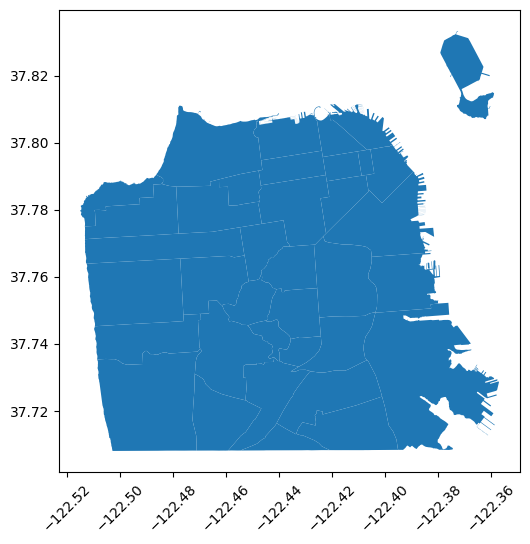

In [20]:
# Sample plot of SF
fig, ax = plt.subplots(figsize=(8, 6))
sf_gdf.plot(ax=ax)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [31]:
g_df.head(n=1)

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Source,geometry
82417,16000018,10/25/2022 06:57:00 PM,10/25/2022 07:56:00 PM,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"80 DIAMOND ST, SAN FRANCISCO, CA, 94114",8.0,Eureka Valley,10/25/2022 07:56:00 PM,Mobile/Open311,POINT (7.76101 -122.43740)


ValueError: aspect must be finite and positive 

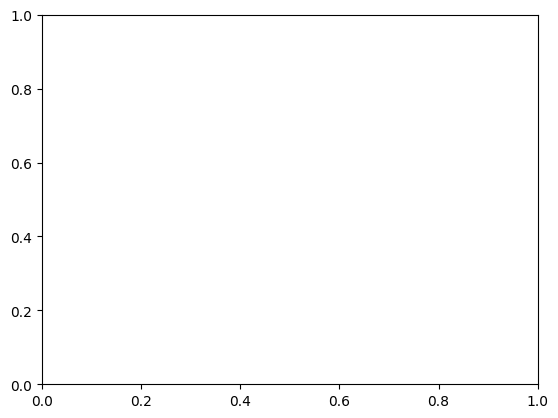

In [36]:
from shapely.geometry import Point, Polygon

g_df = c11_df.copy()
g_df['Point'] = g_df_full['Point'].str.replace('[() ]', '', regex=True)
g_df = g_df[g_df['Point'] != '0.0,0.0']
g_df['geometry'] = [Point(float(coord[1:-1].split(',')[0]), float(coord[1:-1].split(',')[1])) for coord in g_df['Point']]
g_df = g_df.drop(['Point'], axis=1)

g_df = gpd.GeoDataFrame(g_df)
g_df.crs = 'EPSG:4236'

g_df.plot()

In [38]:
g_df.head(n=1)

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Source,geometry
82417,16000018,10/25/2022 06:57:00 PM,10/25/2022 07:56:00 PM,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"80 DIAMOND ST, SAN FRANCISCO, CA, 94114",8.0,Eureka Valley,10/25/2022 07:56:00 PM,Mobile/Open311,POINT (7.76101 -122.43740)


/var/folders/3r/b1k_bcrd15nfyvkh14xg2brc0000gn/T/ipykernel_20181/4134650237.py:8: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



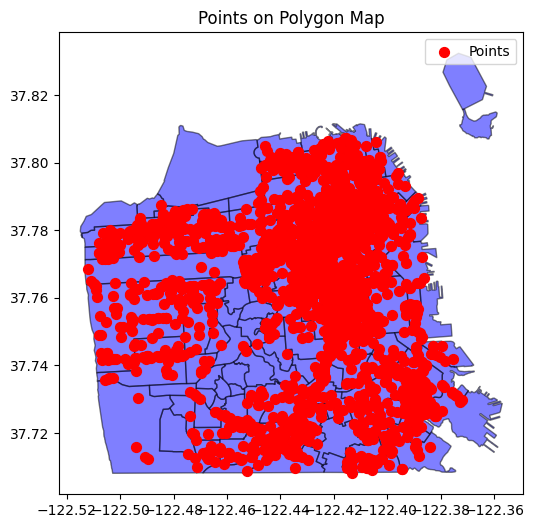

In [215]:
from shapely.geometry import Point

# Plot the polygons and points
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Polygons')
g_df.plot(ax=ax, color='red', markersize=50, label='Points')
ax.set_title('Points on Polygon Map')
ax.legend()
plt.show()

# Understand 311 Call Dataset

In [232]:
df = df[df['Point'] != '0.0,0.0']

In [233]:
# Standardize column data types for easier manipulation later
# Convert 'Opened' column to datetime with the specified format
date_format = '%m/%d/%Y %I:%M:%S %p'
df['Opened'] = pd.to_datetime(df['Opened'], format=date_format)
df['Closed'] = pd.to_datetime(df['Closed'], format=date_format)
df['Updated'] = pd.to_datetime(df['Updated'], format=date_format)

In [235]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

# Use ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [220]:
df.head(n=3)

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Point,Source
82417,16000018,2022-10-25 18:57:00,2022-10-25 19:56:00,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"80 DIAMOND ST, SAN FRANCISCO, CA, 94114",8.0,Eureka Valley,2022-10-25 19:56:00,"(37.76101173, -122.43739519)",Mobile/Open311
45816,15784500,2022-09-06 09:38:00,2022-09-07 07:19:53,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,"561 ELLINGTON AVE, SAN FRANCISCO, CA, 94112",11.0,Outer Mission,2022-09-07 07:19:53,"(0.0, 0.0)",Phone
187701,15327443,2022-05-13 13:59:00,2022-06-02 15:20:18,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,Intersection of WALLER ST and CLAYTON ST,5.0,Cole Valley,2022-06-02 15:20:18,"(37.76886388, -122.44839563)",Mobile/Open311


In [221]:
df.describe(include='all')

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Point,Source
count,3.000000e+03,3000,2965,3000,3000,3000,3000,3000,3000,3000.000000,3000,3000,3000,3000
unique,NaN,NaN,NaN,2,36,1,10,18,2734,NaN,108,NaN,2713,5
top,NaN,NaN,NaN,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Other Loose Garbage,"45 BARTLETT ST, SAN FRANCISCO, CA, 94110",NaN,Mission,NaN,"(0.0, 0.0)",Mobile/Open311
freq,NaN,NaN,NaN,2965,1512,3000,1129,1106,6,NaN,437,NaN,261,2185
mean,1.551233e+07,2022-06-28 15:21:27.672666880,2022-07-01 02:10:48.661382656,NaN,NaN,NaN,NaN,NaN,NaN,6.429000,NaN,2022-06-30 16:28:37.361333248,NaN,NaN
min,1.479630e+07,2022-01-01 14:37:35,2022-01-02 20:36:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2022-01-02 20:36:00,NaN,NaN
25%,1.515208e+07,2022-03-29 08:45:30,2022-03-30 10:56:00,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,2022-03-30 13:23:30,NaN,NaN
50%,1.551241e+07,2022-06-29 09:04:30,2022-07-03 05:38:51,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,2022-07-01 11:14:40,NaN,NaN
75%,1.587890e+07,2022-09-28 12:45:14.500000,2022-10-01 11:07:08,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,2022-09-30 14:01:31.500000,NaN,NaN
max,1.623424e+07,2022-12-29 19:30:00,2023-04-04 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,2023-04-04 10:20:00,NaN,NaN


In [222]:
df.nunique()

CaseID                 3000
Opened                 2980
Closed                 2951
Status                    2
Responsible Agency       36
Category                  1
Request Type             10
Request Details          18
Address                2734
Supervisor District      12
Neighborhood            108
Updated                2985
Point                  2713
Source                    5
dtype: int64

In [223]:
df['Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [224]:
df['Request Type'].unique()

array(['General Cleaning', 'Bulky Items', 'City_garbage_can_overflowing',
       'Human or Animal Waste', 'Hazardous Materials',
       'Transit_shelter_platform', 'Medical Waste', 'Christmas_tree',
       'Automotive', 'Street and Sidewalk Cleaning Request'], dtype=object)

In [30]:
df['Supervisor District'].unique()

array([ 8., 10., 11.,  3.,  7.,  1.,  4.,  9.,  5.,  6.,  2., nan,  0.])

In [29]:
df['Neighborhood'].unique()

array(['Mission Dolores', 'Bayview', 'Ingleside', 'Polk Gulch',
       'Golden Gate Heights', 'Outer Richmond', 'Outer Sunset', 'Mission',
       'Tenderloin', 'Nob Hill', 'South of Market', 'Bernal Heights',
       'Mt. Davidson Manor', 'Lower Haight', 'Union Street',
       'Hunters Point', 'Excelsior', 'Noe Valley',
       'Downtown / Union Square', 'Holly Park', 'Showplace Square',
       'Outer Mission', 'Central Waterfront', 'Russian Hill',
       'Hayes Valley', 'Inner Richmond', "St. Mary's Park",
       'Mission Terrace', 'Dolores Heights', 'Oceanview',
       'Merced Heights', 'Sunnyside', 'Lone Mountain', 'Mint Hill',
       'Civic Center', 'Presidio Terrace', 'Western Addition',
       'Silver Terrace', 'Cathedral Hill', 'Marina', 'Crocker Amazon',
       'Alamo Square', 'India Basin', 'Castro', 'Candlestick Point SRA',
       'Lower Nob Hill', 'Produce Market', 'Haight Ashbury',
       'Miraloma Park', 'Lower Pacific Heights', 'Parnassus Heights',
       'Duboce Triangle',

In [31]:
df['Source'].unique()

array(['Phone', 'Mobile/Open311', 'Web', 'Integrated Agency', 'Twitter'],
      dtype=object)

In [23]:
df.describe(include='all')

,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Point,Source
count,2.929250e+05,292925,289726,292925,292925,292925,292925,292924,292925,292603.000000,292590,292925,292925,292925
unique,NaN,NaN,233630,2,93,1,12,20,71832,NaN,117,236512,230966,5
top,NaN,NaN,01/13/2023 12:00:00 AM,Closed,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 22ND ST and BARTLETT ST,NaN,Mission,05/25/2022 12:00:00 AM,"(0.0, 0.0)",Mobile/Open311
freq,NaN,NaN,54,289726,151184,292925,109974,109882,389,NaN,42468,140,26805,209363
mean,1.551406e+07,2022-06-29 01:08:21.373788672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.359443,NaN,NaN,NaN,NaN
min,1.478894e+07,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,1.514282e+07,2022-03-26 11:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,1.552517e+07,2022-07-02 11:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
75%,1.587656e+07,2022-09-27 21:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN
max,1.623443e+07,2022-12-29 23:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


### 1.1 Data Types
In this dataset, there are 4521 rows and 17 variables, with 2 datatypes: object (aka categories), integers, floats, and datetimes.

In [5]:
# Check data types of all columns
df.dtypes

CaseID                   int64
Opened                  object
Closed                  object
Status                  object
Responsible Agency      object
Category                object
Request Type            object
Request Details         object
Address                 object
Supervisor District    float64
Neighborhood            object
Updated                 object
Point                   object
Source                  object
dtype: object

In [69]:
# Check number of rows and columns
df.shape

(4521, 17)

### 1.2 Cleaning Data
As we can see from the output below, none of the rows have missing values, so no data replacement is necessary.

In [70]:
# The isnull method returns True (1) or False (0) for each value in the dataset
null_data = df.isnull()

# Count the amount of missing data
missing_count = null_data.sum()
# missing_percentage = (missing_count / len(null_data)) * 100
# print(missing_percentage)
print(missing_count)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [71]:
# Count total number of rows with missing data
print(f"Percentage of missing data: {len(df[df.isnull().any(axis=1)])/len(df)}")

Percentage of missing data: 0.0


## 2. Descriptive Statistical Analysis
Our intention for this data is to predict if the client will subscribe (yes/no) to a term deposit (variable y). Some rows may be referring to the same person to at a different time, but they may have different properties then and so it will be useful to train on them as individual datapoints. The instructions did not specify which predictor variables to focus on, so one of our first tasks is to understand the variables before we narrow that down (if we even need to).

Just looking at the variables and their descriptions, my intuition tells me that most variables are general demographical information that are likely to impact a client's probability of subscribing to a term deposit, ex: age, job, their balance, loan, etc. On the other hand, contact, campaign, pdays, previous, and poutcome are metrics specific to this case and would require a bit more investigation. 

Nonetheless, we should explore and visualize them all. We have two main data types: integers and categorical. This means we can create histograms of each variable such that categorical variables display the frequency of occurence for each category. Fortunately, all categories are within a small range. 

Looking at the histograms, it seems no variable has erratic values or needs to be removed.

However, here are some noteworthy observations:
- y: 88% of calls confirmed that clients had not subscribed to a term deposit
- poutcome: for most calls, it is unknown if the previous marketing campaigns were successful
- age: most clients called were in their late 30s
- balance: people's balances are mostly in the range below 10000
- day: calls were made more frequently at different days
- month: calls were made more frequently at different months, mostly on May, July, and August
- job: there is a cascading management, blu-collar, technicians, 
- marital: most people are married, with half the amount single, and a fourth of that divorced
- education: most people have at least secondary education
- default: most people have not defaulted
- loan: most people have no loan

In [80]:
# Count the occurrences of the value 999 in the 'pdays' column
max(df['pdays'])

871

In [87]:
# Calculate the percentage of "no" over "yes" in the 'y' column
percentage_no = df['y'].value_counts(normalize=True).get('no', 0) * 100
print(f'{percentage_no:.2f}')

88.48


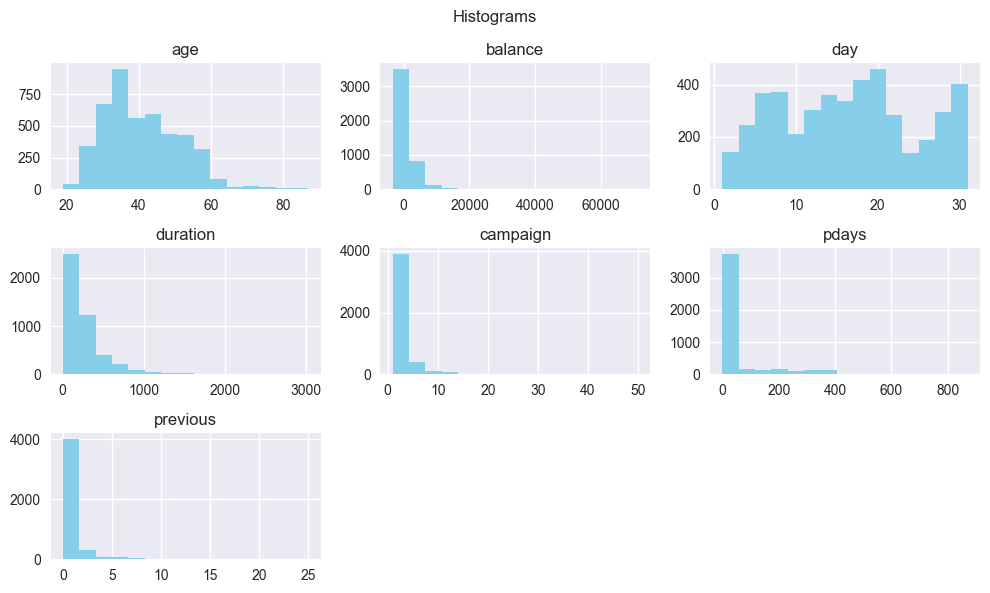

In [72]:
# Create histograms
df.hist(bins=15, figsize=(10, 6), color='skyblue')

# Set the titles and labels for each histogram
plt.suptitle('Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the histograms
plt.show()

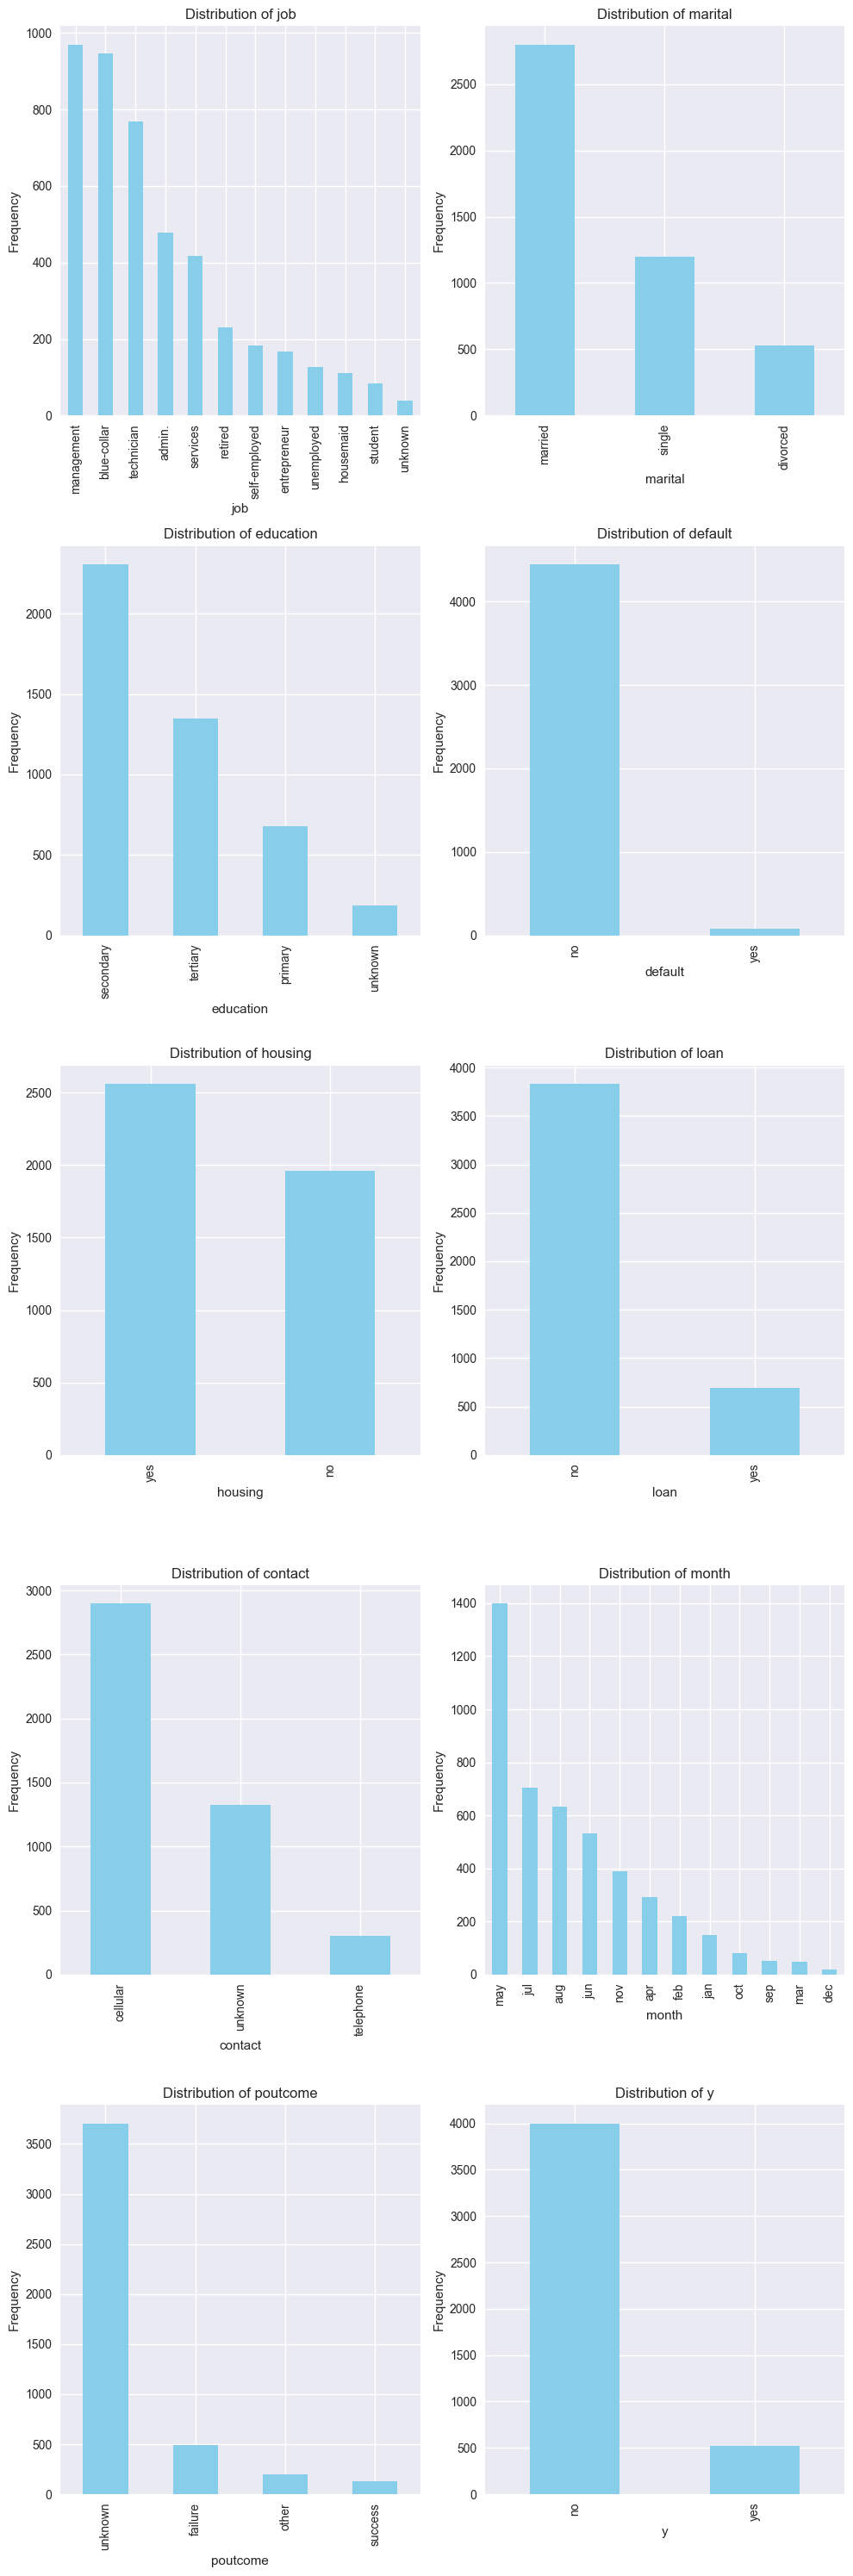

In [73]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(['category']).columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(categorical_cols)
num_rows, num_cols = (num_plots + 1) // 2, min(num_plots, 2)

# Calculate the figure height based on the number of rows
fig_height = num_rows * 6

# Create the subplot grid and plot the bar plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, fig_height))

for ax, col in zip(axes.flat, categorical_cols):
    df[col].value_counts().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# If there's an odd number of plots, remove the empty subplot
if num_plots % 2 == 1:
    fig.delaxes(axes.flat[-1])

plt.tight_layout()
plt.show()

## Correlation matrix
Most variables are not significantly correlated to the others. 

These are worth noting, however:
- month is slightly positively correlated to contact at 0.37
- age is slightly negatively correlated to 'marital' status at -0.38
- previous is somewhat positively correlated to pdays at 0.58
- poutcome is highly negatively correlated to pdays at -0.86
- poutcome is also negatively correlated to previous

In [173]:
# Convert categorical variables to numbers using label encoding
df2 = df.copy()
for col in df.select_dtypes(['category', 'object']):
    df2[col] = df[col].astype('category').cat.codes

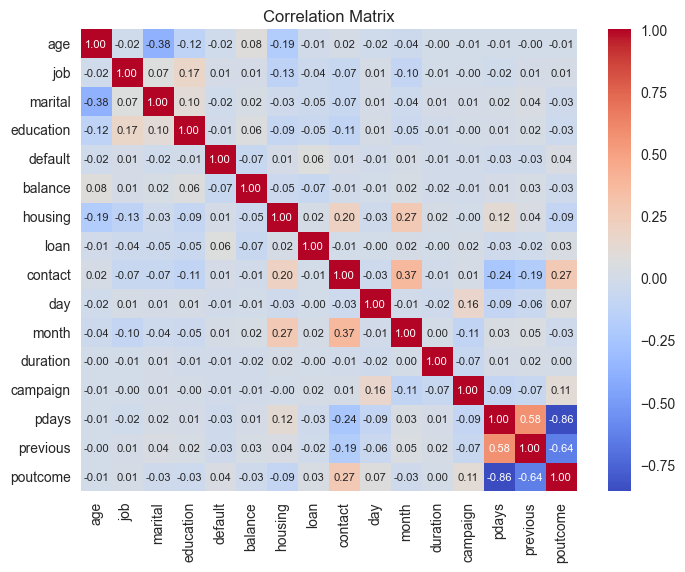

In [126]:
# Create a separate df_corr that drops column 'y'
df_corr = df2.copy()
df_corr = df2.drop('y', axis=1)

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a labeled heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

## 3. Model Creation and Analysis
Our ultimate goal is to create a model that best predicts whether the client will subscribe (yes/no) to a term deposit as determined by the variable y. Thus, I will test out 4 models then compare their R-squared.

### Model 1
Simply create a GLM model that assumes a simple gaussian curve for all the variables because they all have such different distributions.

In [235]:
# Create the GLM Model 1 using Gaussian family
X1 = df2.drop(columns='y')
X1 = sm.add_constant(X)  # Add constant term for intercept
y = df2['y']

model1 = sm.GLM(y, X1, family=sm.families.Gaussian())
results1 = model1.fit()

# Display the summary table for Model 1
print("GLM Model 1 - Gaussian Family")
print(results1.summary())

GLM Model 1 - Gaussian Family
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4504
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                        0.081426
Method:                          IRLS   Log-Likelihood:                -737.03
Date:                Sun, 30 Jul 2023   Deviance:                       366.74
Time:                        22:37:31   Pearson chi2:                     367.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2258
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1248 

## Model 2
Narrow down the variables according to a p-value threshold of 0.05.

In [190]:
# Use p-value to select predictors for model2
threshold = 0.05

predictors2 = results1.pvalues[results1.pvalues < threshold].index
X2 = X[predictors2]

# Create model2 using the selected predictors
model2 = sm.GLM(y, X2, family=sm.families.Gaussian())
results2 = model2.fit()

# Display the summary table for Model 2
print("GLM Model 2 - Feature Selection")
print("Final selected predictors:", X_model2.columns.tolist())
print(results2.summary())

GLM Model 2 - Feature Selection
Final selected predictors: ['const', 'age', 'education', 'housing', 'loan', 'contact', 'duration', 'pdays', 'previous', 'poutcome']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4511
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                        0.081427
Method:                          IRLS   Log-Likelihood:                -740.56
Date:                Sun, 30 Jul 2023   Deviance:                       367.32
Time:                        22:09:37   Pearson chi2:                     367.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2246
Covariance Type:            nonrobust                                         
                 coef    std err          z   

## Model 3
Now, we'll try convert the categorical variables through one-hot encoding instead and create a GLM based on that.

In [207]:
# Get categorical columns from df (excluding 'y')
categorical_cols = df.select_dtypes(['category']).drop(columns='y').columns

# Perform one-hot encoding to create df3
df3 = pd.get_dummies(df, columns=categorical_cols)

# Convert everything to numeric
df3 = df3.apply(pd.to_numeric, errors='ignore')
df3 = df3.astype(int, errors='ignore')

# Convert y to numeric
df3['y'] = pd.to_numeric(df3['y'], errors='coerce').fillna(0).astype(int)

In [208]:
df3

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [209]:
df3.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_divorced       int64
marital_married        int64
marital_single         int64
education_primary      int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
default_no             int64
default_yes            int64
housing_no             int64
housing_yes            int64
loan_no                int64
loan_yes               int64
contact_cellular       int64
contact_teleph

In [217]:
# Create the GLM Model 3
X3 = df3.drop(columns='y')
X3 = sm.add_constant(X3)  # Add constant term for intercept

model3 = sm.GLM(y, X3, family=sm.families.Gaussian())
results3 = model3.fit()

# Display the summary table for Model 3
print("GLM Model 3 - Gaussian Family")
print(results3.summary())

GLM Model 3 - Gaussian Family
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4478
Model Family:                Gaussian   Df Model:                           42
Link Function:               identity   Scale:                        0.073080
Method:                          IRLS   Log-Likelihood:                -479.50
Date:                Sun, 30 Jul 2023   Deviance:                       327.25
Time:                        22:21:18   Pearson chi2:                     327.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3328
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

## Model 4
Narrow down the variables according to a p-value threshold of 0.05.

In [220]:
# Use p-value to select predictors for model2
predictors4 = results3.pvalues[results3.pvalues < threshold].index
X4 = X3[predictors4]

# Create model2 using the selected predictors
model4 = sm.GLM(y, X4, family=sm.families.Gaussian())
results4 = model4.fit()

# Display the summary table for Model 4
print("GLM Model 4 - Feature Selection")
print("Final selected predictors:", predictors4.tolist())
print(results4.summary())

GLM Model 4 - Feature Selection
Final selected predictors: ['const', 'day', 'duration', 'job_blue-collar', 'job_retired', 'marital_divorced', 'education_tertiary', 'default_yes', 'housing_no', 'loan_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4498
Model Family:                Gaussian   Df Model:                           22
Link Function:               identity   Scale:                        0.073052
Method:                          IRLS   Log-Likelihood:                -488.69
Date:                Sun, 30 Jul 2023   Deviance:                       328.59
T

## 5. Conclusion
Based on our different models, model3 performs the best. Though that is likely due to overfitting through the one-hot encoding, it helps us improve our prediction performance.

In [225]:
# List of models
models = [model1, model2, model3, model4]

# Calculate R-squared for each model and store in the DataFrame
r_squared_values = []
for model in models:
    results = model.fit()
    explained_deviance = results.deviance
    total_deviance = results.null_deviance
    r_squared = 1 - (explained_deviance / total_deviance)
    r_squared_values.append(r_squared)

r_squared_df = pd.DataFrame({'R-squared': r_squared_values})

# Find the best model based on R-squared
best_model_index = r_squared_df['R-squared'].idxmax()
best_model = models[best_model_index]

# Display the R-squared values for all models
print("R-squared values for each model:")
r_squared_df.index = [f"Model {i+1}" for i in range(len(models))]
print(r_squared_df)

# Print the best model
print("Best model based on R-squared: Model", best_model_index + 1)

R-squared values for each model:
         R-squared
Model 1   0.204394
Model 2   0.203151
Model 3   0.290064
Model 4   0.287170
Best model based on R-squared: Model 3


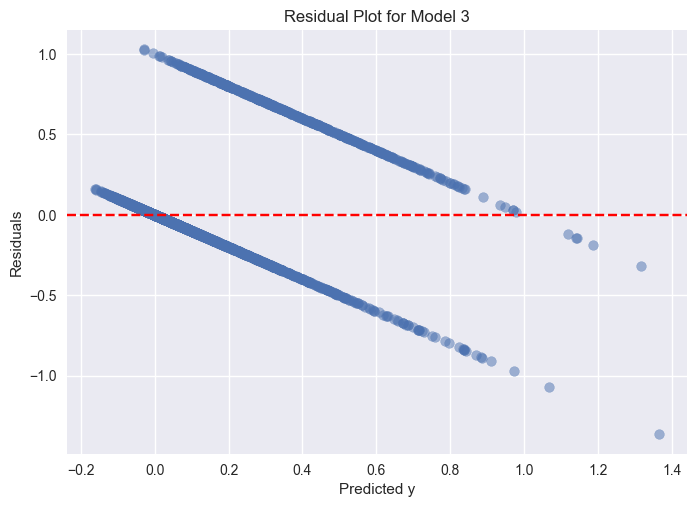

In [240]:
# Obtain the predicted values
y_pred = results3.predict(X3)

# Calculate the residuals
residuals_model3 = y - y_pred

# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, residuals_model3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='dashed')  # Adding a horizontal line at y=0 for reference
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Residual Plot for Model 3')
plt.show()